In [1]:
# import the required libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=8, suppress=True)
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from utils import *
# import utils
# import imp
# imp.reload(utils)

# libraries required for visualisation:
from IPython.display import SVG, display
import svgwrite  # conda install -c omnia svgwrite=1.1.6
# function used to draw a sketch


# load data
# data = np.load('./dataset/light bulb.full.npz',encoding='latin1')
# data = np.load('./dataset/hot air balloon.full.npz',encoding='latin1')
# data = np.load('./dataset/microphone.full.npz',encoding='latin1')
data = np.load('./dataset/ice cream.full.npz',encoding='latin1')

train_sketches = data['train']
valid_sketches = data['valid']
test_sketches = data['test']
print('num train: {}'.format(len(train_sketches)))
print('num valid: {}'.format(len(valid_sketches)))
print('num test: {}'.format(len(test_sketches)))
print(train_sketches[0][:5])

num train: 107258
num valid: 2500
num test: 2500
[[  24   43    0]
 [  29   68    0]
 [  11   51    0]
 [   3  -61    0]
 [  23 -111    0]]


In [2]:
# preprocess sketches
train_sketches = preprocess(train_sketches)
valid_sketches = preprocess(valid_sketches)
test_sketches = preprocess(test_sketches)
print(train_sketches[0][:5])
# calculate normailizing factor
normalizing_scale_factor = calculate_normalizing_scale_factor(train_sketches)
print('normalizing_scale_factor {:4.4f}.'.format(normalizing_scale_factor))

# normalize dataset
train_sketches = normalize(train_sketches, normalizing_scale_factor)
valid_sketches = normalize(valid_sketches, normalizing_scale_factor)
test_sketches = normalize(test_sketches, normalizing_scale_factor)
print(train_sketches[0][:5])
# convert to stroke-5 format
train_sketches = to_big_sketches(train_sketches)
valid_sketches = to_big_sketches(valid_sketches)
test_sketches = to_big_sketches(test_sketches)
print(train_sketches[0][:5])

print('done')

[[  24.   43.    0.]
 [  29.   68.    0.]
 [  11.   51.    0.]
 [   3.  -61.    0.]
 [  23. -111.    0.]]
normalizing_scale_factor 41.7452.
[[ 0.57491606  1.0300579   0.        ]
 [ 0.6946902   1.6289289   0.        ]
 [ 0.2635032   1.2216966   0.        ]
 [ 0.07186451 -1.4612451   0.        ]
 [ 0.55096126 -2.6589868   0.        ]]
[[ 0.57491606  1.03005791  1.          0.          0.        ]
 [ 0.69469023  1.6289289   1.          0.          0.        ]
 [ 0.26350319  1.22169662  1.          0.          0.        ]
 [ 0.07186451 -1.46124506  1.          0.          0.        ]
 [ 0.55096126 -2.65898681  1.          0.          0.        ]]
done


In [3]:
# print(to_normal_strokes(train_sketches[0]))
import utils
from utils import *
import imp
imp.reload(utils)
# n = 20
# for n in range(3000,4000):
#     if len(train_sketches[n])>30:
#         continue
#     foo = draw_strokes(to_normal_strokes(train_sketches[n]))
#     print(n,len(train_sketches[n]))

<module 'utils' from 'C:\\Users\\a1989\\Desktop\\DL\\Comp5\\utils.py'>

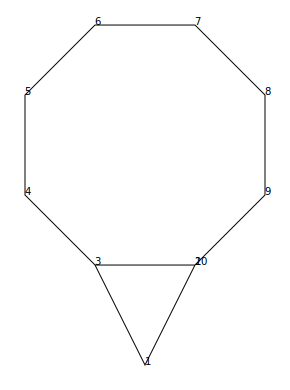

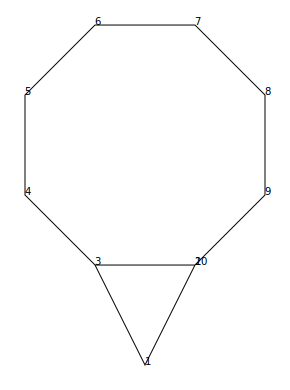

In [4]:
simple=np.array([[ 0.0, 0.0, 1, 0,0],
    [1.0, 2.0, 1, 0,0],
    [1.0, -2.0, 1, 0,0],
    [-2.0, 0.0, 1, 0,0],
    [-1.4,-1.4, 1, 0,0],
    [-0.0,-2.0, 1, 0,0],
    [ 1.4,-1.4, 1, 0,0],
    [ 2.0,-0.0, 1, 0,0],
    [ 1.4, 1.4, 1, 0,0],
    [ 0.0, 2.0, 1, 0,0],
    [-1.4, 1.4, 0, 1,0],
])

simple[:,:2]*=10
draw_strokes(to_normal_strokes(simple),show_pen_sequence=True)

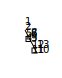

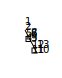

In [57]:
# [dx , dy, pen_down, pen_up, stop]

simple=np.array([[ 0.0, 0.0, 1, 0,0],
                 [ 0.0, 0.0, 0, 1,0],
                 [ 0.0, 1.0, 1, 0,0],
                 [ 1.2, 2.3, 1, 0,0],
                 [-1.0, 0.0, 1, 0,0],
                 [ 0.0,-1.0, 1, 0,0],
                 [ 1.0, 0.0, 1, 0,0]
])
simple2=np.array([[ 0.0, 0.0, 1, 0,0],
                 [ 0.0, 0.0, 0, 1,0],
                 [ 0.0, 1.0, 1, 0,0],
                 [ 1.2, 2.3, 1, 0,0],
                 [-1.0, 0.0, 1, 0,0],
                 [ 0.0,-1.0, 1, 0,0],
                 [ 1.0, 0.0, 1, 0,0]
])

# simple[:,:2]*=20
# simple2[:,:2]*=20

simple = np.concatenate((simple,simple2),axis=0)
draw_strokes(to_normal_strokes(simple),show_pen_sequence=True)

In [48]:
a = [1,2,3]
a[:-1]

[1, 2]

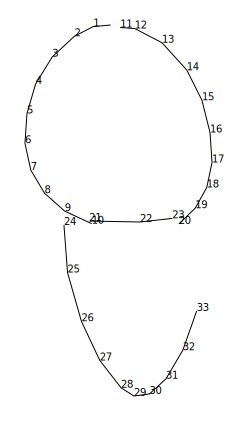

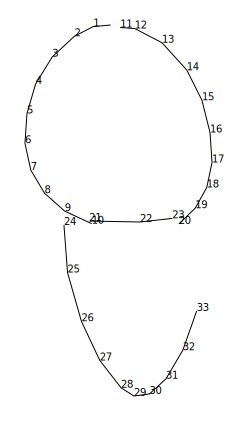

In [5]:
simple=np.array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [-0.34845298,  0.03168889,  1.        ,  0.        ,  0.        ],
       [-0.3763992 ,  0.19354844,  1.        ,  0.        ,  0.        ],
       [-0.44402289,  0.4130265 ,  1.        ,  0.        ,  0.        ],
       [-0.33287505,  0.54221999,  1.        ,  0.        ,  0.        ],
       [-0.17361353,  0.59189985,  1.        ,  0.        ,  0.        ],
       [-0.03993873,  0.59696218,  1.        ,  0.        ,  0.        ],
       [ 0.11683334,  0.53697558,  1.        ,  0.        ,  0.        ],
       [ 0.27618972,  0.4637633 ,  1.        ,  0.        ,  0.        ],
       [ 0.40490404,  0.35921916,  1.        ,  0.        ,  0.        ],
       [ 0.53797942,  0.24913601,  0.        ,  1.        ,  0.        ],
       [ 0.57026284, -3.9291382 ,  1.        ,  0.        ,  0.        ],
       [ 0.29235828,  0.02215576,  1.        ,  0.        ,  0.        ],
       [ 0.546755  ,  0.28491473,  1.        ,  0.        ,  0.        ],
       [ 0.49728831,  0.54777164,  1.        ,  0.        ,  0.        ],
       [ 0.30104475,  0.60087417,  1.        ,  0.        ,  0.        ],
       [ 0.16271543,  0.64962407,  1.        ,  0.        ,  0.        ],
       [ 0.04030556,  0.59841301,  1.        ,  0.        ,  0.        ],
       [-0.10476429,  0.49962055,  1.        ,  0.        ,  0.        ],
       [-0.23292646,  0.41757735,  1.        ,  0.        ,  0.        ],
       [-0.32773405,  0.3136388 ,  0.        ,  1.        ,  0.        ],
       [-1.793306  , -0.05660424,  1.        ,  0.        ,  0.        ],
       [ 1.01680368,  0.01756106,  1.        ,  0.        ,  0.        ],
       [ 0.64753156, -0.07210392,  0.        ,  1.        ,  0.        ],
       [-2.17141911,  0.13417065,  1.        ,  0.        ,  0.        ],
       [ 0.07178056,  0.95209982,  1.        ,  0.        ,  0.        ],
       [ 0.27793344,  0.97576363,  1.        ,  0.        ,  0.        ],
       [ 0.36827939,  0.78362832,  1.        ,  0.        ,  0.        ],
       [ 0.42543261,  0.54778982,  1.        ,  0.        ,  0.        ],
       [ 0.25706665,  0.1640275 ,  1.        ,  0.        ,  0.        ],
       [ 0.31310821, -0.04237663,  1.        ,  0.        ,  0.        ],
       [ 0.32977486, -0.3019366 ,  1.        ,  0.        ,  0.        ],
       [ 0.33715138, -0.57273561,  1.        ,  0.        ,  0.        ],
       [ 0.27767479, -0.78556419,  0.        ,  1.        ,  0.        ]])

simple[:,:2]*=10
draw_strokes(to_normal_strokes(simple),show_pen_sequence=True)

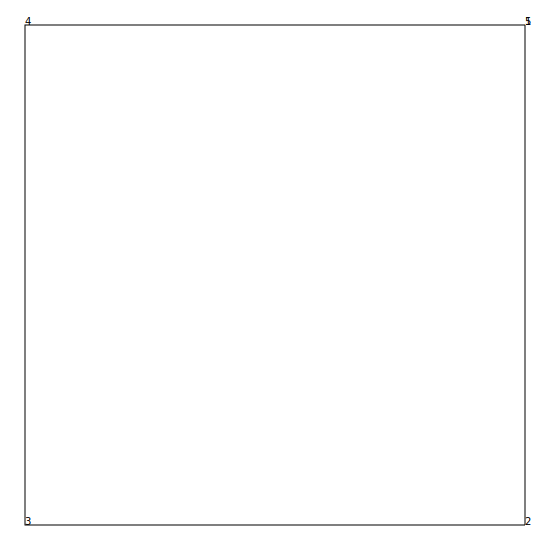

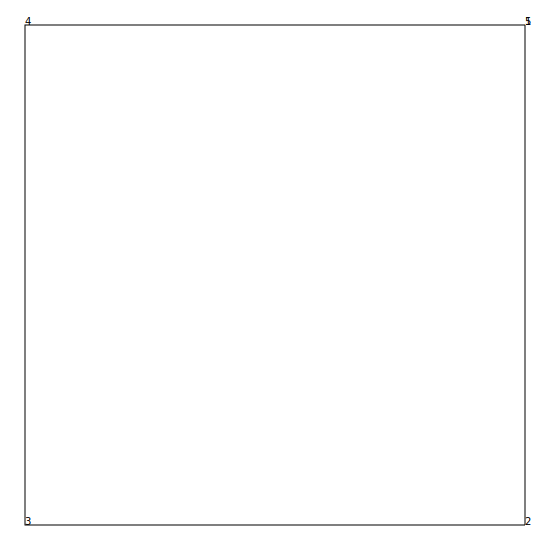

In [168]:
simple=np.array([[ 0.0, 0.0, 1, 0,0],
    [ 0.0, -10.0, 0, 1,0],      
    [ 0.0, 10.0, 1, 0,0],
    [ -10.0, 0.0, 1, 0,0],
    [ 0.0, -10.0, 1, 0,0],
    [ 10.0, 0.0, 0, 1,0]
])

simple[:,:2]*=10
draw_strokes(to_normal_strokes(simple),show_pen_sequence=True)

In [72]:
def go_back(history):
    x,y = np.sum(history,axis=0)[:2]
#     print(x,y,simple)
    n = int(np.ceil(max(x,y)))
    lst = np.zeros((n,5))
    x_ = x/n
    y_ = y/n
    lst[:,0] = -x_
    lst[:,1] = -y_
    lst[:,3] = 1
    lst[-1,3] = 0
    lst[-1,2] = 1
    return lst
print(np.sum(simple,axis=0)[:2])
go_back(simple)


[ 2.97841191 -0.91584444]


array([[-0.99280397,  0.30528148,  0.        ,  1.        ,  0.        ],
       [-0.99280397,  0.30528148,  0.        ,  1.        ,  0.        ],
       [-0.99280397,  0.30528148,  1.        ,  0.        ,  0.        ]])

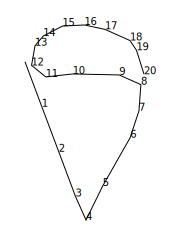

In [57]:
ice=np.array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.33723726,  0.9 ,  1.        ,  0.        ,  0.        ],
       [ 0.33801074,  0.9,  1.        ,  0.        ,  0.        ],
       [ 0.33728634,  0.9,  1.        ,  0.        ,  0.        ],
       [ 0.20952217,  0.46887963,  1.        ,  0.        ,  0.        ],
       [ 0.33425487, -0.68217094,  1.        ,  0.        ,  0.        ],
       [ 0.54911187, -0.96608985,  1.        ,  0.        ,  0.        ],
       [ 0.1767253 , -0.53924123,  1.        ,  0.        ,  0.        ],
       [ 0.038424  , -0.52267113,  1.        ,  0.        ,  0.        ],
       [-0.43504955, -0.19516976,  1.        ,  0.        ,  0.        ],
       [-0.93035214, -0.0194721 ,  1.        ,  0.        ,  0.        ],
       [-0.53898667,  0.05936348,  1.        ,  0.        ,  0.        ],
       [-0.28474408, -0.23035759,  1.        ,  0.        ,  0.        ],
       [ 0.06897274, -0.39256686,  1.        ,  0.        ,  0.        ],
       [ 0.16570638, -0.19613263,  1.        ,  0.        ,  0.        ],
       [ 0.3852427 , -0.19910979,  1.        ,  0.        ,  0.        ],
       [ 0.43795129, -0.02199969,  1.        ,  0.        ,  0.        ],
       [ 0.41096443,  0.08807703,  1.        ,  0.        ,  0.        ],
       [ 0.5026497 ,  0.22444737,  1.        ,  0.        ,  0.        ],
       [ 0.12993467,  0.194743  ,  1.        ,  0.        ,  0.        ],
       [ 0.15061277,  0.4784492 ,  1.        ,  0.        ,  0.        ],
        ])
ice[:,:2]*=10
draw_strokes(to_normal_strokes(ice),show_pen_sequence=True);
ice[:,:2]/=10


In [58]:
noise = np.array( [[ 0.20952217,  0.46887963,  1.        ,  0.        ,  0.        ],
       [ 0.33425487, -0.68217094,  1.        ,  0.        ,  0.        ],
       [ 0.54911187, -0.96608985,  1.        ,  0.        ,  0.        ]])
simple = np.concatenate((ice[:10],noise),axis=0)
simple[:,:2]*=10
draw_strokes(to_normal_strokes(simple),show_pen_sequence=True)
simple[:,:2]/=10

In [74]:
my_act = go_back(simple[-3:,:])
simple = np.concatenate((simple,my_act),axis=0)
simple[:,:2]*=10
draw_strokes(to_normal_strokes(simple),show_pen_sequence=True)
simple[:,:2]/=10

[[-0.54644445  0.58969058  0.          1.          0.        ]
 [-0.54644445  0.58969058  1.          0.          0.        ]]


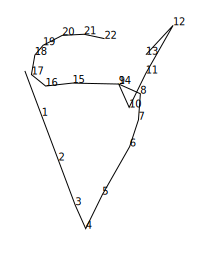

In [76]:
my_act = ice[10:18]
simple = np.concatenate((simple,my_act),axis=0)
simple[:,:2]*=10
draw_strokes(to_normal_strokes(simple),show_pen_sequence=True)
simple[:,:2]/=10

In [140]:
def check_stroke(stroke):
    if len(stroke) > 10:
        print('longer than 10')
    for i in range(len(stroke) - 1):
        if (stroke[-1][2:] != [1., 0., 0.]).all() and (stroke[-1][2:] != [
            0., 1., 0.
        ]).all() and (stroke[-1][2:] != [0., 0., 1.]).all():
            raise Exception
    if (stroke[-1][2:] != [0., 1., 0.]).all() and (stroke[-1][2:] != [0., 0., 1.
                                                                      ]).all():
        raise Exception
check_stroke(simple)

longer than 10


In [81]:
print(train_sketches[n])
print(train_sketches[n][:,1]/train_sketches[n][:,0])

[[-0.44372535 -0.39935282  1.          0.          0.        ]
 [-0.31060776 -0.66558802  1.          0.          0.        ]
 [-0.24404895 -0.93182325  1.          0.          0.        ]
 [ 0.02218627 -0.66558802  1.          0.          0.        ]
 [ 0.19967641 -0.39935282  1.          0.          0.        ]
 [ 0.46591163 -0.55465668  1.          0.          0.        ]
 [ 0.64340174 -0.39935282  1.          0.          0.        ]
 [ 0.4215391  -0.1331176   1.          0.          0.        ]
 [ 1.44210744  0.          1.          0.          0.        ]
 [ 0.4215391   0.15530388  1.          0.          0.        ]
 [ 0.35498029  0.17749014  1.          0.          0.        ]
 [ 0.1331176   0.15530388  1.          0.          0.        ]
 [ 0.33279401  0.79870564  1.          0.          0.        ]
 [ 0.04437254  0.90963697  1.          0.          0.        ]
 [-0.0665588   0.33279401  1.          0.          0.        ]
 [-0.1331176   0.24404895  1.          0.          0.  

C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


[  0.90000001   2.14285702   3.81818173 -29.99999899  -2.
  -1.19047616  -0.62068968  -0.31578945   0.           0.36842106
   0.5          1.16666676   2.40000004  20.49999958  -5.00000011
  -1.83333346  -1.55000003  -1.          -0.          -0.46666669
  -0.02469136  -0.59999999   2.99999983  20.99999983  -0.23529413
   0.           0.5                -inf   5.14285692]


In [31]:
import matplotlib.cm as cm
from tqdm import tqdm_notebook as tqdm

# print(len(sketch))
# print(sketch[0])

outdir = './dataset/bulb/' 
no = 0
for i in tqdm(range(len(train_sketches))):
    sketch = train_sketches[i]
    img = render_imgs(np.array([sketch]),64,len(sketch))
    plt.imsave(outdir+str(no)+'.png', np.array(img).reshape(64,64), cmap=cm.gray)
    no+=1
for i in tqdm(range(len(valid_sketches))):
    sketch = valid_sketches[i]
    img = render_imgs(np.array([sketch]),64,len(sketch))
    plt.imsave(outdir+str(no)+'.png', np.array(img).reshape(64,64), cmap=cm.gray)
    no+=1
for i in tqdm(range(len(test_sketches))):
    sketch = test_sketches[i]
    img = render_imgs(np.array([sketch]),64,len(sketch))
    plt.imsave(outdir+str(no)+'.png', np.array(img).reshape(64,64), cmap=cm.gray)
    no+=1


In [125]:
import tensorflow as tf
x = tf.constant(2)
y = tf.constant(5)
def f1(): return np.array([1,2])
def f2(): return np.array([3,4])
r = tf.cond(tf.equal(x, y), f1, f2)


In [126]:
sess = tf.Session()
with sess.as_default():   # or `with sess:` to close on exit
    print(r.eval())

[3 4]


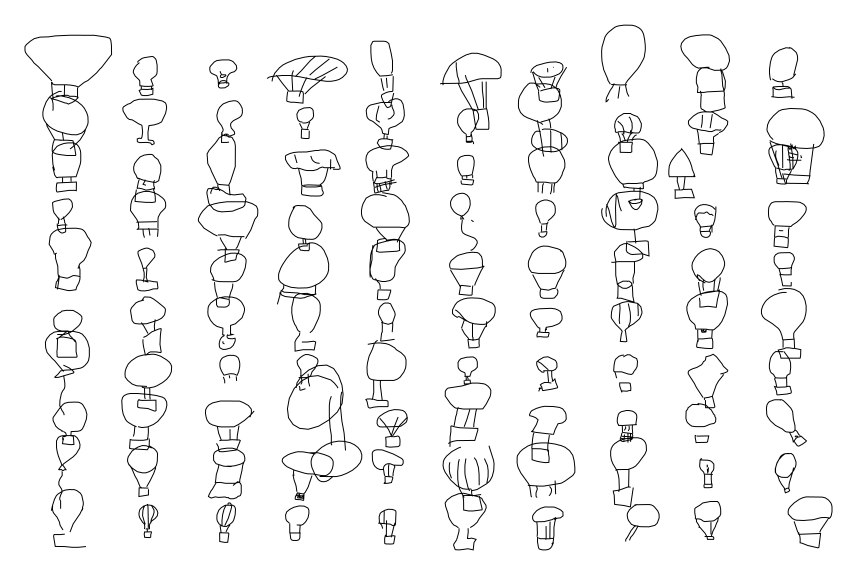

In [42]:
sketches_grid = []
for i in range(10):
    for j in range(10):
        sketches_grid.append(
            [to_normal_strokes(train_sketches[i * 10 + j]), [i, j]])
sketches_grid = make_grid_svg(sketches_grid)
draw_strokes(sketches_grid)


In [11]:
# import the required libraries
import time
import random
import json
import tensorflow as tf
# function used to generate next point


def adjust_temp(pi_pdf, temp):
    pi_pdf = np.log(pi_pdf) / temp
    pi_pdf -= pi_pdf.max()
    pi_pdf = np.exp(pi_pdf)
    pi_pdf /= pi_pdf.sum()
    return pi_pdf


def get_pi_idx(x, pdf, temp=1.0, greedy=False):
    """Samples from a pdf, optionally greedily."""
    if greedy:
        return np.argmax(pdf)
    pdf = adjust_temp(np.copy(pdf), temp)
    accumulate = 0
    for i in range(0, pdf.size):
        accumulate += pdf[i]
        if accumulate >= x:
            return i
    tf.logging.info('Error with sampling ensemble.')
    return -1


def sample_gaussian_2d(mu1, mu2, s1, s2, rho, temp=1.0, greedy=False):
    if greedy:
        return mu1, mu2
    mean = [mu1, mu2]
    s1 *= temp * temp
    s2 *= temp * temp
    cov = [[s1 * s1, rho * s1 * s2], [rho * s1 * s2, s2 * s2]]
    x = np.random.multivariate_normal(mean, cov, 1)
    return x[0][0], x[0][1]


class SRNN_Model():

    def __init__(self, hps, model_name='sketch_rnn'):
        self.hps = hps
        self.model_name = model_name
        with tf.variable_scope(model_name, reuse=tf.AUTO_REUSE):
            self.build_model(hps)

    def build_model(self, hps):

        # input and output
        self.batch_size = tf.placeholder(
            dtype=tf.int32, shape=[], name='batch_size')
        self.input_sequence = tf.placeholder(
            dtype=tf.float32,
            shape=[None, hps.max_seq_len + 1, 5],
            name='input_sequence')
        input_sequence = self.input_sequence[:, :-1]
        output_sequence = self.input_sequence[:, 1:, :]
        self.lstm_cell = tf.nn.rnn_cell.LSTMCell(hps.dec_rnn_size)
        self.zero_state = self.lstm_cell.zero_state(
            self.batch_size, tf.float32)
        output, _ = tf.nn.dynamic_rnn(
            self.lstm_cell, input_sequence, initial_state=self.zero_state)
        output = tf.reshape(output, [-1, hps.dec_rnn_size])

        # for each input timestamp, output parameters for mixture of gaussian
        num_hidden = hps.num_mixture * 6 + 3

        def feed_forward(output):
            with tf.variable_scope('feed_forward', reuse=tf.AUTO_REUSE):
                return tf.layers.dense(output, num_hidden)

        output = feed_forward(output)
        #######################################################################
        """
        Loss for mixture of multivariate gaussian. Given (prev_delta_x, prev_delta_y, prev_p1, prev_p2, prev_p3), 
        we want the mixture to output high probility P(delta_x, delta_y|prev_delta_x, prev_delta_y, prev_p1, prev_p2, prev_p3),
        see equation (9) at https://arxiv.org/pdf/1704.03477.pdf
        
        parameters:
            pi: weight of each mixture, shape (batch_size*max_seq_len, num_mixture)
            mu1, mu2: mu of (delta_x, delta_y), shape (batch_size*max_seq_len, num_mixture)
            sigma1, sigma2: sigma of (delta_x, delta_y), shape (batch_size*max_seq_len, num_mixture)
            corr: correction of (delta_x, delta_y), shape (batch_size*max_seq_len, num_mixture)
        """
        output_params = tf.split(
            output, num_or_size_splits=[3] + [hps.num_mixture] * 6, axis=1)
        output_pen_logits, output_mixture_pi, output_mu1, output_mu2, output_sigma1, output_sigma2, output_corr = output_params

        # softmax all the pi's and pen states:
        output_mixture_pi = tf.nn.softmax(output_mixture_pi)
        output_pen_pi = tf.nn.softmax(output_pen_logits)

        # exponentiate the sigmas and also make corr between -1 and 1.
        output_sigma1 = tf.exp(output_sigma1)
        output_sigma2 = tf.exp(output_sigma2)
        output_corr = tf.tanh(output_corr)

        x1 = tf.reshape(output_sequence[:, :, 0], [-1, 1])
        x2 = tf.reshape(output_sequence[:, :, 1], [-1, 1])

        def tf_2d_normal(x1, x2, mu1, mu2, s1, s2, rho):
            """
                  Returns P(delta_x, delta_y|prev_delta_x, prev_delta_y, prev_p1, prev_p2, prev_p3), 
                  see equation (24) of http://arxiv.org/abs/1308.0850 or 
                  https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Bivariate_case
                  """
            norm1 = tf.subtract(x1, mu1)
            norm2 = tf.subtract(x2, mu2)
            s1s2 = tf.multiply(s1, s2)
            # eq 25
            z = (tf.square(tf.div(norm1, s1)) + tf.square(tf.div(norm2, s2)) -
                 2 * tf.div(tf.multiply(rho, tf.multiply(norm1, norm2)), s1s2))
            neg_rho = 1 - tf.square(rho) + 1e-6  # avoid divide by zero
            result = tf.exp(tf.div(-z, 2 * neg_rho))
            denom = 2 * np.pi * tf.multiply(s1s2, tf.sqrt(neg_rho))
            result = tf.div(result, denom)
            self.denom = denom
            self.neg_rho = neg_rho
            self.s1s2 = s1s2
            self.s1 = s1
            self.s2 = s2
            return result

        point_prob = tf_2d_normal(x1, x2, output_mu1, output_mu2, output_sigma1,
                                  output_sigma2, output_corr)
        point_prob = tf.multiply(
            point_prob, output_mixture_pi)  # multiply weight of each mixture
        point_prob = tf.reduce_sum(point_prob, axis=1)

        # loss for indicating if pen should stop
        pen_labels = tf.reshape(output_sequence[:, :, 2:],
                                [-1, 3])  # (batch_size*max_seq_len ,3)
        pen_loss = tf.nn.softmax_cross_entropy_with_logits_v2(
            labels=pen_labels, logits=output_pen_logits)
        self.pen_loss = tf.reduce_mean(pen_loss)

        # loss for delta x,y
        delta_xy_loss = -tf.log(point_prob + 1e-6)  # avoid log(0)
        mask = 1.0 - pen_labels[:, 2]
        mask = tf.reshape(mask, [-1, 1])
        delta_xy_loss = delta_xy_loss * mask
        self.delta_xy_loss = tf.reduce_mean(delta_xy_loss)

        self.loss = self.pen_loss + self.delta_xy_loss

        # optimize rnn
        self.global_step = tf.get_variable(
            name='global_step', initializer=tf.constant(0.), trainable=False)
        self.learning_rate = tf.get_variable(
            name='learning_rate',
            initializer=tf.constant(hps.learning_rate),
            trainable=False)
        optimizer = tf.train.AdamOptimizer(self.learning_rate)
        var_list = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                                     self.model_name + '/')
        grad_vars = optimizer.compute_gradients(self.loss, var_list=var_list)
        grad_vars = [(tf.clip_by_value(grad, -hps.grad_clip, hps.grad_clip), var)
                     for grad, var in grad_vars]
        self.train_op = optimizer.apply_gradients(
            grad_vars, global_step=self.global_step, name='train_step')

        #################### tensor for generating a point ####################
        self.prev_state = self.lstm_cell.zero_state(1, dtype=tf.float32)
        self.prev_point = tf.placeholder(
            tf.float32, shape=[1, 5], name='prev_point')
        output, self.next_state = self.lstm_cell(
            self.prev_point, self.prev_state)
        output = tf.reshape(output, [-1, hps.dec_rnn_size])
        output = feed_forward(output)
        self.output_pi, self.output_mu1, self.output_mu2, self.output_sigma1, self.output_sigma2, self.output_corr = \
            tf.split(output[:, 3:], num_or_size_splits=6, axis=1)
        pen_logits = output[:, :3]
        self.output_pi = tf.nn.softmax(self.output_pi)
        self.pen_pi = tf.nn.softmax(pen_logits)
        self.output_sigma1 = tf.exp(self.output_sigma1)
        self.output_sigma2 = tf.exp(self.output_sigma2)
        self.output_corr = tf.tanh(self.output_corr)

    def generate_stroke(self, sess, prev_sketch, temperature=0.1, greedy=False):
        """
            *****************************IMPORTANT*****************************
            1. your model must have this function, or error happen when evaluation.
            2. the length of stroke must less than 10, which means you can at most generate 10 points.
            *******************************************************************
            this function return a stroke given previous generated sketch
            """
        # feed previous sketch to get hidden state
        prev_state = sess.run(self.zero_state, feed_dict={self.batch_size: 1})
        for i in range(len(prev_sketch) - 1):
            feed_dict = {
                self.prev_state: prev_state,
                self.prev_point: [prev_sketch[i]],
            }
            prev_state = sess.run(self.next_state, feed_dict)

        # start to generate next stroke
        prev_point = [prev_sketch[-1]]
        generated_stroke = []
        while len(generated_stroke) < 10:
            feed_dict = {
                self.prev_state: prev_state,
                self.prev_point: prev_point,
            }
            params = sess.run([
                self.output_pi, self.output_mu1, self.output_mu2, self.output_sigma1,
                self.output_sigma2, self.output_corr, self.pen_pi, self.next_state
            ], feed_dict)

            [o_pi, o_mu1, o_mu2, o_sigma1, o_sigma2, o_corr, o_pen,
             next_state] = params

            # sample index of bivarite normal in mixture to use
            idx = get_pi_idx(np.random.random(), o_pi[0], temperature, greedy)

            # sample index of pen state
            idx_eos = get_pi_idx(np.random.random(), o_pen[
                                 0], temperature, greedy)
            eos = [0, 0, 0]
            eos[idx_eos] = 1

            # use one bivarite normal to generate next (delta_x, delta_y)
            next_x1, next_x2 = sample_gaussian_2d(o_mu1[0][idx], o_mu2[0][idx],
                                                  o_sigma1[0][
                                                      idx], o_sigma2[0][idx],
                                                  o_corr[0][idx],
                                                  np.sqrt(temperature), greedy)

            prev_point = np.zeros([1, 5])
            prev_point[0, :] = [next_x1, next_x2, eos[0], eos[1], eos[2]]
            prev_state = next_state
            generated_stroke.append(prev_point)

            # if this stroke stop
            if prev_point[0][4] == 1:
                generated_stroke[-1][0][:2] = 0
            if prev_point[0][4] == 1 or prev_point[0][3] == 1:
                break
        # pen state should end with p2=1 or p3=1
        if generated_stroke[-1][0][2] == 1:
            generated_stroke[-1][0][2:] = [0., 1., 0.]
        return np.concatenate(generated_stroke, axis=0)

    def generate_sketches(self, sess, num_generate, temperature, greedy=False):
        initial_point = np.array([[0., 0., 1., 0., 0.]])
        initial_state = sess.run(
            self.zero_state, feed_dict={self.batch_size: 1})
        return_sketches = []
        for i in range(num_generate):
            sketch = [initial_point]
            prev_point = initial_point
            prev_state = initial_state
            for j in range(self.hps.max_seq_len):
                feed_dict = {
                    self.prev_state: prev_state,
                    self.prev_point: prev_point,
                }
                params = sess.run([
                    self.output_pi, self.output_mu1, self.output_mu2,
                    self.output_sigma1, self.output_sigma2, self.output_corr,
                    self.pen_pi, self.next_state
                ], feed_dict)

                [o_pi, o_mu1, o_mu2, o_sigma1, o_sigma2, o_corr, o_pen,
                 next_state] = params
                idx = get_pi_idx(random.random(), o_pi[0], temperature, greedy)

                idx_eos = get_pi_idx(random.random(), o_pen[
                                     0], temperature, greedy)
                eos = [0, 0, 0]
                eos[idx_eos] = 1

                next_x1, next_x2 = sample_gaussian_2d(o_mu1[0][idx], o_mu2[0][idx],
                                                      o_sigma1[0][idx],
                                                      o_sigma2[0][
                                                          idx], o_corr[0][idx],
                                                      np.sqrt(temperature), greedy)

                prev_point = np.zeros([1, 5])
                prev_point[0, :] = [next_x1, next_x2, eos[0], eos[1], eos[2]]
                prev_state = next_state

                # select a multivariate normal in mixture to draw next point
                sketch.append(prev_point)
                if prev_point[0][4] == 1:
                    sketch[-1][0][:2] = 0
                    break
            return_sketches.append(np.concatenate(sketch, axis=0))
        return return_sketches

    def train(self, sess, x_train, x_valid, x_test, num_epoch=20, batch_size=100):
        start = time.time()
        best_valid_cost = np.inf
        counter = 0
        patience = 20
        num_epoch = 100
        batch_size = 100
        for epoch in range(num_epoch):

            def gen_batch(x):
                shuffle_idx = np.random.permutation(len(x))
                x = x[shuffle_idx]
                num_batch = len(x) // batch_size
                for i in range(num_batch):
                    yield x[i * batch_size:(i + 1) * batch_size]

            losses = []
            delta_xy_losses = []
            pen_losses = []
            for x_batch in gen_batch(x_train):
                step = sess.run(self.global_step)
                curr_learning_rate = ((hps.learning_rate - hps.min_learning_rate) *
                                      (hps.decay_rate)**step + hps.min_learning_rate)
                feed_dict = {
                    self.input_sequence: x_batch,
                    self.learning_rate: curr_learning_rate,
                    self.batch_size: len(x_batch)
                }
                (loss, delta_xy_loss, pen_loss, _) = sess.run(
                    [self.loss, self.delta_xy_loss, self.pen_loss,
                     self.train_op], feed_dict)
                losses.append(loss)
                delta_xy_losses.append(delta_xy_loss)
                pen_losses.append(pen_loss)
                if step % 20 == 0 and step > 0:
                    end = time.time()
                    time_taken = end - start
                    tf.logging.info((
                        'step: {}, learning_rate: {:.4f}, loss: {:.4f}, xy_loss: {:.4f}, '
                        + 'pen_loss: {:.4f}, time_taken: {:.2f}').format(
                            step, curr_learning_rate,
                            np.mean(losses),
                            np.mean(delta_xy_losses), np.mean(pen_losses), time_taken))
                    losses = []
                    delta_xy_losses = []
                    pen_losses = []
                    start = time.time()
                if step % 1000 == 0 and step > 0:
                    N = 10
                    sketches = self.generate_sketches(
                        sess, num_generate=N, temperature=0.5)
                    reconstructions = []
                    for i in range(N):
                        reconstructions.append(
                            [to_normal_strokes(sketches[i]), [0, i]])
                    stroke_grid = make_grid_svg(reconstructions)
                    draw_strokes(stroke_grid)

                if step % self.hps.save_every == 0 and step > 0:
                    start = time.time()
                    test_losses = []
                    test_delta_xy_losses = []
                    test_pen_losses = []
                    for x_batch in gen_batch(x_valid):
                        feed_dict = {
                            self.input_sequence: x_batch,
                            self.batch_size: len(x_batch)
                        }

                        (loss, delta_xy_loss, pen_loss) = sess.run(
                            [self.loss, self.delta_xy_loss, self.pen_loss], feed_dict)
                        test_losses.append(loss)
                        test_delta_xy_losses.append(delta_xy_loss)
                        test_pen_losses.append(pen_loss)

                    end = time.time()
                    time_taken = end - start
                    tf.logging.info(
                        ('validation, step: {}, loss: {:.4f}, xy_loss: {:.4f}, ' +
                         'pen_loss: {:.4f}, time_taken: {:.2f}').format(
                             step,
                             np.mean(test_losses),
                             np.mean(test_delta_xy_losses),
                             np.mean(test_pen_losses), time_taken))
                    start = time.time()

                    if np.mean(test_losses) < best_valid_cost:
                        best_valid_cost = np.mean(test_losses)
                        self.save_model(sess, step=step)
                        test_losses = []
                        test_delta_xy_losses = []
                        test_pen_losses = []
                        for x_batch in gen_batch(x_test):
                            feed_dict = {
                                self.input_sequence: x_batch,
                                self.batch_size: len(x_batch)
                            }

                            (loss, delta_xy_loss, pen_loss) = sess.run(
                                [self.loss, self.delta_xy_loss, self.pen_loss], feed_dict)
                            test_losses.append(loss)
                            test_delta_xy_losses.append(delta_xy_loss)
                            test_pen_losses.append(pen_loss)

                        end = time.time()
                        time_taken = end - start
                        tf.logging.info(
                            ('testing, step: {}, loss: {:.4f}, xy_loss: {:.4f}, ' +
                             'pen_loss: {:.4f}, time_taken: {:.2f}').format(
                                 step,
                                 np.mean(test_losses),
                                 np.mean(test_delta_xy_losses),
                                 np.mean(test_pen_losses), time_taken))
                        counter = 0
                    else:
                        counter += 1
                        if counter > patience:
                            tf.logging.info('early stop!!')
                            return

    def save_model(self, sess, checkpoint_dir='./checkpoints', step=None):
        if not os.path.exists(checkpoint_dir):
            os.makedirs(checkpoint_dir)
        saver = tf.train.Saver(
            tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, self.model_name +'/'))
        if step is not None:
            saver.save(sess, os.path.join(checkpoint_dir, self.model_name), global_step=int(step))
        else:
            saver.save(sess, os.path.join(checkpoint_dir, self.model_name))


    def load_model(self, sess, checkpoint_dir='./checkpoints', step=None):
        """
            *****************************IMPORTANT*****************************
            1. your model must have this function, or error happen when evaluation.
            *******************************************************************
            this function load weight to sess
            """
        saver = tf.train.Saver(
            tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, self.model_name +
                              '/'))
        if step is not None:
            saver.restore(sess,
                          os.path.join(checkpoint_dir,
                                       self.model_name + '-{}'.format(step)))
        else:
            saver.restore(sess, os.path.join(checkpoint_dir, self.model_name))


C:\Users\a1989\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [16]:
def pad_data(sketches, max_seq_len):
    """Pad the batch to be stroke-5 bigger format as described in paper."""
    result = np.zeros((len(sketches), max_seq_len + 1, 5), dtype=float)
    for i in range(len(sketches)):
        l = len(sketches[i])
        result[i, 0:l, :] = sketches[i][:, :]
        result[i, l:, 4] = 1

        # put in the first token, as described in sketch-rnn methodology
        result[i, 1:, :] = result[i, :-1, :]
        result[i, 0, :] = 0
        result[i, 0, 2] = 1  # setting S_0 from paper.
    return result


def get_max_len(sketches):
    """Return the maximum length of an array of strokes."""
    max_len = 0
    for sketch in sketches:
        ml = len(sketch)
        if ml > max_len:
            max_len = ml
    return max_len
# get max sequence length and pad data
max_seq_len = get_max_len(train_sketches)
x_train = pad_data(train_sketches, max_seq_len)
x_valid = pad_data(valid_sketches, max_seq_len)
x_test = pad_data(test_sketches, max_seq_len)


def copy_hparams(hparams):
    """Return a copy of an HParams instance."""
    return tf.contrib.training.HParams(**hparams.values())


def get_default_hparams():
    """Return default HParams for sketch-rnn."""
    hparams = tf.contrib.training.HParams(
        data_set=['aaron_sheep.npz'],  # Our dataset.
        save_every=2000,  # Number of batches per checkpoint creation.
        max_seq_len=250,  # Not used. Will be changed by model. [Eliminate?]
        dec_rnn_size=1024,  # Size of decoder.
        batch_size=100,  # Minibatch size. Recommend leaving at 100.
        grad_clip=1.0,  # Gradient clipping. Recommend leaving at 1.0.
        num_mixture=20,  # Number of mixtures in Gaussian mixture model.
        learning_rate=0.001,  # Learning rate.
        decay_rate=0.9999,  # Learning rate decay per minibatch.
        kl_decay_rate=0.99995,  # KL annealing decay rate per minibatch.
        min_learning_rate=0.00001,  # Minimum learning rate.
        use_recurrent_dropout=True,  # Dropout with memory loss. Recomended
        recurrent_dropout_prob=0.90,  # Probability of recurrent dropout keep.
        use_input_dropout=False,  # Input dropout. Recommend leaving False.
        input_dropout_prob=0.90,  # Probability of input dropout keep.
        use_output_dropout=False,  # Output droput. Recommend leaving False.
        output_dropout_prob=0.90,  # Probability of output dropout keep.
        random_scale_factor=0.15,  # Random scaling data augmention proportion.
        augment_stroke_prob=0.10,  # Point dropping augmentation proportion.
        conditional=True,  # When False, use unconditional decoder-only model.
        is_training=True  # Is model training? Recommend keeping true.
    )
    return hparams
hps = get_default_hparams()
hps.max_seq_len = max_seq_len
tf.reset_default_graph()
tf.set_random_seed(123)
np.random.seed(123)
random.seed(123)
model = SRNN_Model(hps, model_name='balloon')

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
sess.run(tf.global_variables_initializer())


INFO:tensorflow:Restoring parameters from ./checkpoints/balloon-102000


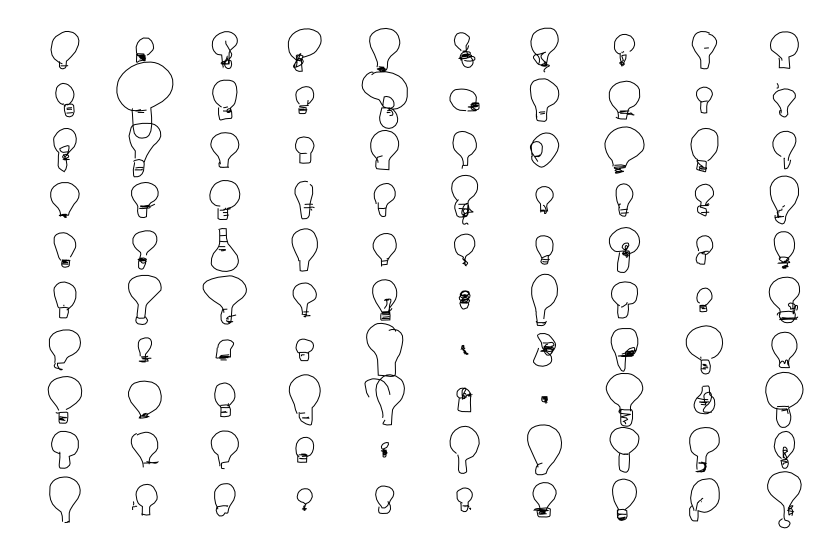

done


In [39]:

# model.train(sess, x_train, x_valid, x_test, num_epoch=20, batch_size=100)
model.load_model(sess, step=102000)

sketches_grid = []
sketches = model.generate_sketches(sess, num_generate=100, temperature=0.5)
for i in range(10):
    for j in range(10):
        sketches_grid.append([to_normal_strokes(sketches[i * 10 + j]), [i, j]])
sketches_grid = make_grid_svg(sketches_grid)
draw_strokes(sketches_grid)
print('done')

In [17]:
class Evaluate_model:

    def __init__(self, image_size, model_name='evaluate_model'):
        with tf.variable_scope(model_name, reuse=tf.AUTO_REUSE):
            self.input_x = tf.placeholder(
                tf.float32, [None, image_size, image_size], name="input_x")
            self.labels = tf.placeholder(tf.int32, [None], name="input_y")
            self.keep_rate = tf.placeholder(tf.float32, [], name="keep_rate")

            hidden = tf.reshape(self.input_x, [-1, image_size, image_size, 1])
            hidden = tf.layers.conv2d(
                hidden,
                filters=64,
                kernel_size=5,
                activation=tf.nn.relu,
                padding='same')
            hidden = tf.nn.lrn(
                hidden, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm1')
            hidden = tf.layers.conv2d(
                hidden,
                filters=64,
                kernel_size=5,
                activation=tf.nn.relu,
                padding='same')
            hidden = tf.nn.lrn(
                hidden, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm2')
            hidden = tf.layers.max_pooling2d(
                hidden, pool_size=3, strides=2, padding='same')
            hidden = tf.layers.conv2d(
                hidden,
                filters=128,
                kernel_size=5,
                activation=tf.nn.relu,
                padding='same')
            hidden = tf.nn.lrn(
                hidden, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm3')
            hidden = tf.layers.conv2d(
                hidden,
                filters=128,
                kernel_size=5,
                activation=tf.nn.relu,
                padding='same')
            hidden = tf.nn.lrn(
                hidden, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm4')
            hidden = tf.layers.max_pooling2d(
                hidden, pool_size=3, strides=2, padding='same')
            hidden = tf.layers.flatten(hidden)
            hidden = tf.layers.dense(hidden, 384)
            hidden = tf.layers.dense(hidden, 192)
            hidden = tf.layers.dense(hidden, 96)

            # Add dropout
            with tf.variable_scope("dropout"):
                hidden = tf.layers.dropout(hidden, 1 - self.keep_rate)
            hidden = tf.layers.dense(hidden, 4)
            self.predictions = tf.nn.softmax(hidden)


In [18]:
# Game
def play_game(player1, player2):
    """
          player1, player2: dict containing 12 sketch-model. 
          In your model, you need to implement *generate_stroke* function.
      """
    player1_win = 0
    player2_win = 0
    draw = 0
    generated_sketches = []
    who_draw_the_strokes = []

    # load evaluate model
    evaluate_model = Evaluate_model(
        image_size=64, model_name='evaluate_model2')

    srcs = [v for v in tf.global_variables() if 'evaluate_model2' in v.name]
    saver = tf.train.Saver(srcs)
    saver.restore(sess, './checkpoints/evaluate_model2')

    THRESHOLD = 150  # if a sketch longer than threshold, stop
    for class_to_draw1 in ['balloon', 'bulb', 'ice', 'microphone']:
        for class_to_draw2 in ['balloon', 'bulb', 'ice', 'microphone']:
            if class_to_draw1 == class_to_draw2:
                continue
            dict_key1 = '{}-{}'.format(class_to_draw1, class_to_draw2)
            dict_key2 = '{}-{}'.format(class_to_draw2, class_to_draw1)

            # we will use different random seed when evaluating your model
            np.random.seed(123)
            random.seed(123)

            num_games = 100
            sketches = []  # record sketch
            results = []  # record result class
            rendered_imgs = []  # record rendered image
            who_draw_the_strokes_game = []
            for i in range(num_games):
                player1_stop = False
                player2_stop = False
                who_draw_the_stroke = []
                input_sequence = np.array(
                    [[0., 0., 1., 0., 0.]])  # start token
                turn = int(i >= 50)  # after 50 games, player2 draw first

                while len(input_sequence) < THRESHOLD:
                    if turn % 2 == 0 and not player1_stop:
                        generated_stroke = player1[dict_key1].generate_stroke(
                            sess, input_sequence)
                        try:  # if your stroke not follow rule, skip your turn
                            check_stroke(generated_stroke)
                        except:
                            turn += 1
                            print('skip player1')
                            continue
                        who_draw_the_stroke.append(0)
                        if generated_stroke[-1][4] == 1:
                            player1_stop = True
                            generated_stroke[-1][2:] = [0., 1., 0.]
                    elif turn % 2 == 1 and not player2_stop:
                        generated_stroke = player2[dict_key2].generate_stroke(
                            sess, input_sequence)
                        try:  # if your stroke not follow rule, skip your turn
                            check_stroke(generated_stroke)
                        except:
                            turn += 1
                            continue
                        who_draw_the_stroke.append(1)
                        if generated_stroke[-1][4] == 1:
                            player2_stop = True
                            generated_stroke[-1][2:] = [0., 1., 0.]
                    elif player1_stop and player2_stop:
                        input_sequence[-1][2:] = [0., 0., 1.]
                        break
                    else:
                        turn += 1
                        continue
                    input_sequence = np.concatenate(
                        [input_sequence, generated_stroke], axis=0)
                    turn += 1
                    result, rendered_img = predict(sess, evaluate_model, input_sequence,
                                                   class_to_draw1, class_to_draw2)

                    # after turn 4, we check if game end
                    if turn >= 4 and result != 'draw':
                        break

                    if input_sequence[-1][4] == 1:
                        break
                results.append(result)
                sketches.append(input_sequence)
                rendered_imgs.append(rendered_img)
                who_draw_the_strokes_game.append(who_draw_the_stroke)
            # plot rendered images
            print('player1 draw {}, player2 draw {}'.format(class_to_draw1,
                                                            class_to_draw2))
            fig, axs = plt.subplots(10, 10, figsize=(20, 20))
            axs = axs.flatten()
            for i in range(len(rendered_imgs)):
                axs[i].imshow(rendered_imgs[i], cmap='gray')
                axs[i].set_xticks([])
                axs[i].set_yticks([])
                axs[i].set_title(results[i])
            plt.show()
            print(
                'In 100 games, {} of sketches look like {}, {} of sketches look like {}, {} of sketches look like others'.
                format((np.array(results) == class_to_draw1).sum(), class_to_draw1, (
                    np.array(results) == class_to_draw2).sum(), class_to_draw2, (
                        np.array(results) == 'draw').sum()))
            player1_win += (np.array(results) == class_to_draw1).sum()
            player2_win += (np.array(results) == class_to_draw2).sum()
            draw += (np.array(results) == 'draw').sum()
            generated_sketches.append(sketches)
            who_draw_the_strokes.append(who_draw_the_strokes_game)
    print('player1 win {} games, player2 win {} games, {} games draw'.format(
        player1_win, player2_win, draw))
    return generated_sketches, who_draw_the_strokes


def predict(sess, evaluate_model, sketch, class_to_draw1, class_to_draw2):
    THRESHOLD = 0.75

    # render sketch to image
    img_size = 64
    max_seq_len = len(sketch)
    rendered_imgs = render_imgs(np.array([sketch]), img_size, max_seq_len)

    # run cnn prediction
    feed_dict = {
        evaluate_model.input_x: rendered_imgs,
        evaluate_model.keep_rate: 1.0,
    }
    predictions = sess.run(evaluate_model.predictions, feed_dict=feed_dict)

    encode_dict = {
        'balloon': 0,  # label of balloon
        'bulb': 1,  # label of bulb
        'ice': 2,  # label of ice
        'microphone': 3  # label of microphone
    }
    p1 = predictions[0, encode_dict[class_to_draw1]]
    p2 = predictions[0, encode_dict[class_to_draw2]]
    if p1 > p2 and p1 > THRESHOLD:
        return class_to_draw1, rendered_imgs[0]
    elif p1 < p2 and p2 > THRESHOLD:
        return class_to_draw2, rendered_imgs[0]
    else:
        return 'draw', rendered_imgs[0]


def check_stroke(stroke):
    if len(stroke) > 10:
        print('longer than 10')
    for i in range(len(stroke) - 1):
        if (stroke[-1][2:] != [1., 0., 0.]).all() and (stroke[-1][2:] != [
            0., 1., 0.
        ]).all() and (stroke[-1][2:] != [0., 0., 1.]).all():
            raise Exception
    if (stroke[-1][2:] != [0., 1., 0.]).all() and (stroke[-1][2:] != [0., 0., 1.
                                                                      ]).all():
        raise Exception
# # load model
draw_model = {}
for class_to_draw in ['balloon', 'bulb', 'ice', 'microphone']:
    for class_to_compete in ['balloon', 'bulb', 'ice', 'microphone']:
        if class_to_draw == class_to_compete:
            continue
        dict_key = '{}-{}'.format(class_to_draw, class_to_compete)
        model_name = '{}-{}'.format(class_to_draw, class_to_compete)
        with tf.device('/cpu:0'):
            draw_model[dict_key] = SRNN_Model(hps, model_name=model_name)
            draw_model[dict_key].load_model(sess)
import ta_60_model as player2
hps = player2.get_default_hparams()
draw_model_ta_60 = {}
for class_to_draw in ['balloon', 'bulb', 'ice', 'microphone']:
    for class_to_compete in ['balloon', 'bulb', 'ice', 'microphone']:
        if class_to_draw == class_to_compete:
            continue
        dict_key = '{}-{}'.format(class_to_draw, class_to_compete)
        model_name = '{}-{}-60'.format(class_to_draw, class_to_compete)
        with tf.device('/cpu:0'):
            draw_model_ta_60[dict_key] = player2.SRNN_Model(
                hps, model_name=model_name)
            draw_model_ta_60[dict_key].load_model(sess)
print('done')

INFO:tensorflow:Restoring parameters from ./checkpoints\balloon-bulb
INFO:tensorflow:Restoring parameters from ./checkpoints\balloon-ice
INFO:tensorflow:Restoring parameters from ./checkpoints\balloon-microphone
INFO:tensorflow:Restoring parameters from ./checkpoints\bulb-balloon
INFO:tensorflow:Restoring parameters from ./checkpoints\bulb-ice
INFO:tensorflow:Restoring parameters from ./checkpoints\bulb-microphone
INFO:tensorflow:Restoring parameters from ./checkpoints\ice-balloon
INFO:tensorflow:Restoring parameters from ./checkpoints\ice-bulb
INFO:tensorflow:Restoring parameters from ./checkpoints\ice-microphone
INFO:tensorflow:Restoring parameters from ./checkpoints\microphone-balloon
INFO:tensorflow:Restoring parameters from ./checkpoints\microphone-bulb
INFO:tensorflow:Restoring parameters from ./checkpoints\microphone-ice
INFO:tensorflow:Restoring parameters from ./checkpoints\balloon-bulb-60
INFO:tensorflow:Restoring parameters from ./checkpoints\balloon-ice-60
INFO:tensorflow:R

In [ ]:
result, who_draw_the_strokes = play_game(draw_model, draw_model_ta_60)

INFO:tensorflow:Restoring parameters from ./checkpoints/evaluate_model2


In [27]:
model = SRNN_Model(hps, model_name='team-1-balloon-bulb')

ERROR! Session/line number was not unique in database. History logging moved to new session 302


In [ ]:
class SRNN_Model:
    def generate_stroke(self, sess, prev_sketch):
        pass
    def load_model(self, sess):
        pass

def get_default_hparams():
    pass

In [ ]:
with tf.device('/cpu:0'):
    pretrain_model = SRNN_Model(hps, model_name='balloon')
    pretrain_model.load_model(sess)
model = SRNN_Model(hps, model_name='balloon-bulb')

# assign weights
srcs = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'balloon/')
tars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'balloon-bulb/')
assert len(srcs) == len(tars)
update_ops = []
for src, tar in zip(srcs, tars):
    update_ops.append(tar.assign(src))
sess.run(update_ops)
